### ***Problem Statement*** : Develop a machine learning model that can predict the likelihood of an individual developing heart disease based on their medical and lifestyle attributes. This model should assist healthcare professionals in identifying at-risk patients early, enabling them to take preventive measures and provide timely interventions to reduce the incidence of heart disease.`


**Dataset Description:**
* age: The age of the individual.
* sex: The gender of the individual (1 for male, 0 for female).
* cp: Chest pain type (values 0, 1, 2, or 3 representing different types).
* trestbps: Resting blood pressure (in mm Hg).
* chol: Cholesterol level (in mg/dL).
* fbs: Fasting blood sugar level (1 for above 120 mg/dL, 0 for below).
* restecg: Resting electrocardiographic results (values 0, 1, or 2).  
* thalach: Maximum heart rate achieved during exercise.
* exang: Exercise-induced angina (1 for yes, 0 for no).
* oldpeak: ST segment depression induced by exercise relative to rest.
* slope: Slope of the peak exercise ST segment (values 0, 1, or 2).  
* thal: Results of the thallium stress test (values 0, 1, 2, or 3).  
* target: The presence or absence of heart disease (1 for presence, 0 for absence).
# ###This data can be used to train a machine learning model to predict whether an individual has heart disease (target variable) based on their other characteristics.   










### **Importing the Dependencies**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

### **Data Description**

In [ ]:
# Load dataset
df_heart = pd.read_csv('/content/heart_disease_data.csv')
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_heart.shape

(303, 14)

In [ ]:
df_heart.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [ ]:
# print first 5 rows of the dataset
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **Data Cleaning/Pre-processing**

In [ ]:
# checking for missing values
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df_heart.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

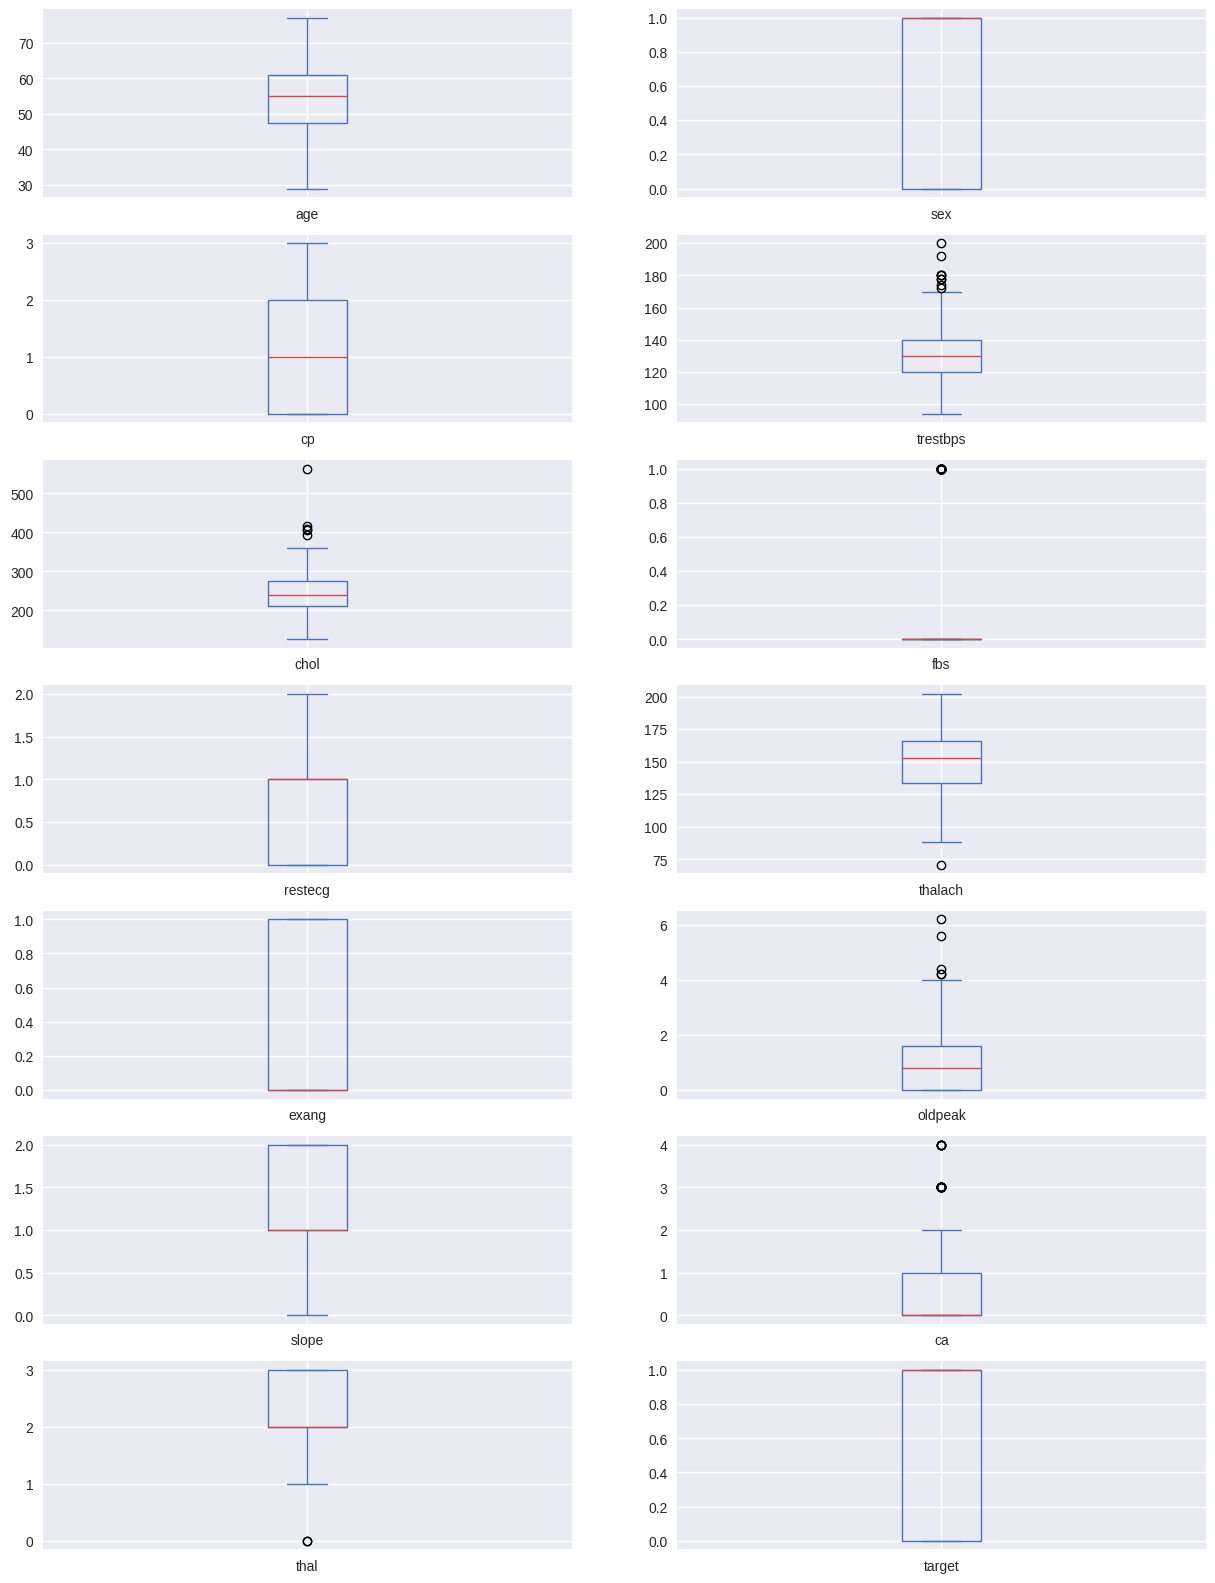

In [ ]:
df_heart.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [ ]:
# class distribution
df_heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# 1 --> Defective Heart
# 0 --> Healthy Heart

### **Exploratory Data Analysis**

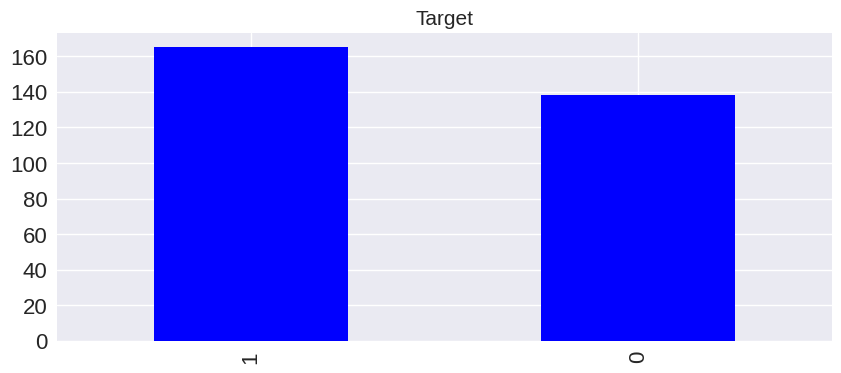

In [ ]:
df_heart.target.value_counts().plot(
    kind="bar",
    figsize=(10,4),
    color = "blue",
    fontsize=16
)

plt.title("Target",fontsize=15)
plt.show()

In [ ]:
# scaling numeric data
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_heart_ready = df_heart.copy()

scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_heart_ready[num_cols] = scaler.fit_transform(df_heart[num_cols])

df_heart_ready.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


### **Partition the dataset in training and testing**

In [ ]:
# Split dataset into training and testing
# Select Features
feature = df_heart_ready.drop('target', axis=1)
# Select Target
target = df_heart_ready['target']
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)
# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (242, 13)
Shape of testing feature: (61, 13)
Shape of training label: (242,)
Shape of training label: (61,)


### **Apply Machine learning classification models**

In [ ]:
# Modelling

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
from sklearn import tree

# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])

Accuracy: 0.7213114754098361


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])

Accuracy: 0.7377049180327869


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])

Accuracy: 0.7540983606557377


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])

Accuracy: 0.7704918032786885


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### **Evaluate models in terms of performance metrics**

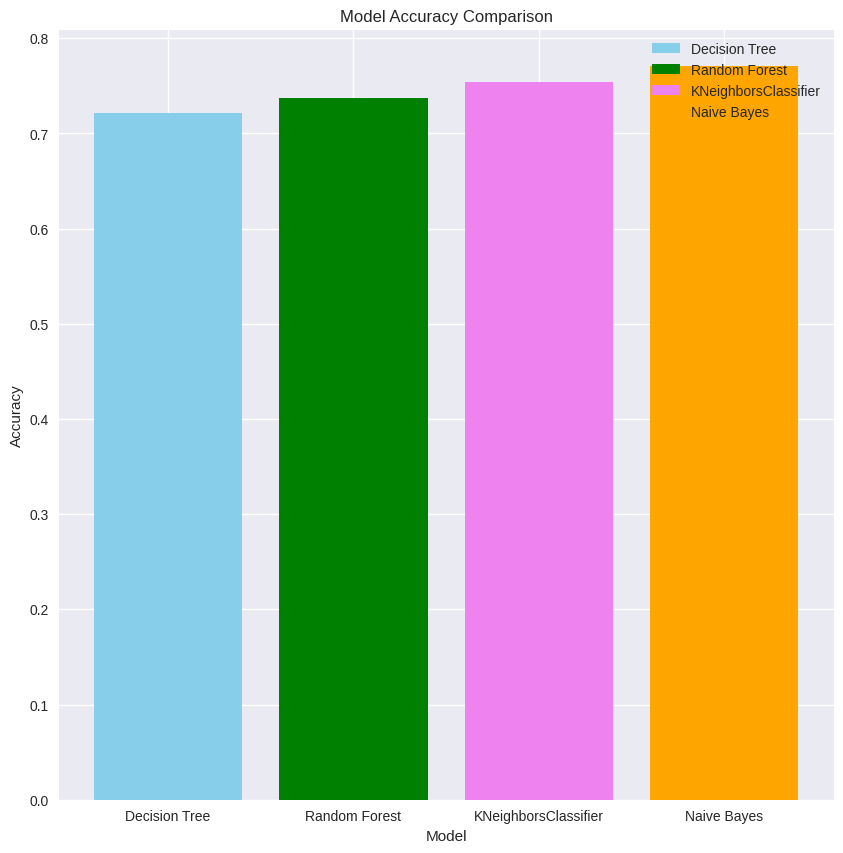

In [ ]:
# Model names and corresponding accuracies
models = ['Decision Tree', 'Random Forest','KNeighborsClassifier','Naive Bayes']
accuracies = [dtc_eval['acc'], rf_eval['acc'],knn_eval['acc'],nb_eval['acc']]
plt.figure(figsize=(10,10))
bar_width = 0.2

# Create a bar graph
bars=plt.bar(models, accuracies, color=['skyblue','green','violet','orange'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.legend(bars,models)

# Display the graph
plt.show()

### Conclusion : Naive Bayes machine learning algo is best suited for your dataset in terms of performance metrics. The Accuracy obtained by these model is 77% which is more compare to the other model used in the project.